# How well do jobs and skills pay for Data Analysts?

### Methodology
1. Evaluate Median Salaries for Data Roles.
2. Median Salary for top 7 Skills.
3. Plot the Pay for Skills and Roles.

## Importing Data and Libraries and Basic Cleanup.


In [1]:
#Importing Essential Modules and Libraries
import ast
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns


#loading Data

df=load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Rahul Bhardwaj\anaconda3\envs\plearn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Selecting Country and Data Role for Skill Pay Analysis

In [77]:
selected_country='India'
no_of_title=3 # for India there are few no of job posting with Salary
selected_title = 'Data Analyst'
df_sel=df[df['job_country']==selected_country].dropna(subset=['salary_year_avg'])


### Evaluating Median Salaries for various Data Roles

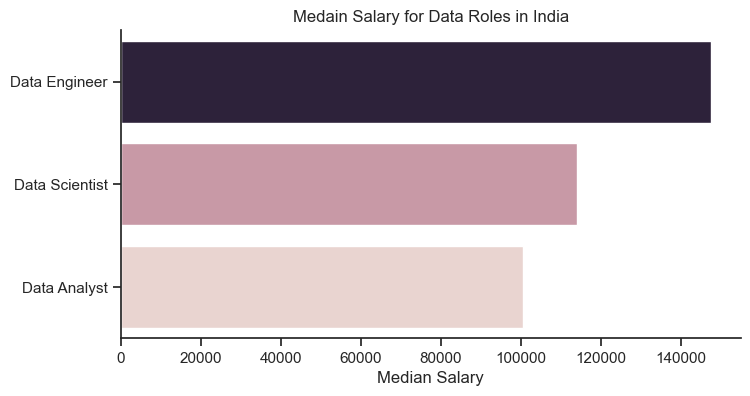

In [78]:
job_titles = df_sel['job_title_short'].value_counts().index[:no_of_title].tolist()
df_plot_top=df_sel[df_sel['job_title_short'].isin(job_titles)]
df_plot=df_plot_top.groupby(by='job_title_short')['salary_year_avg'].median().sort_values(ascending=False).reset_index(name='Median_Salary')
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x='Median_Salary',y='job_title_short',hue='Median_Salary',legend=False, width=0.8)
sns.despine()
plt.ylabel('')
plt.xlabel('Median Salary')
plt.title(f'Medain Salary for Data Roles in {selected_country}')

order_list=df_plot['job_title_short'].values

### Plotting the Salary Distributions

Text(0.5, 1.0, 'Salary Distribution for Data Roles in India')

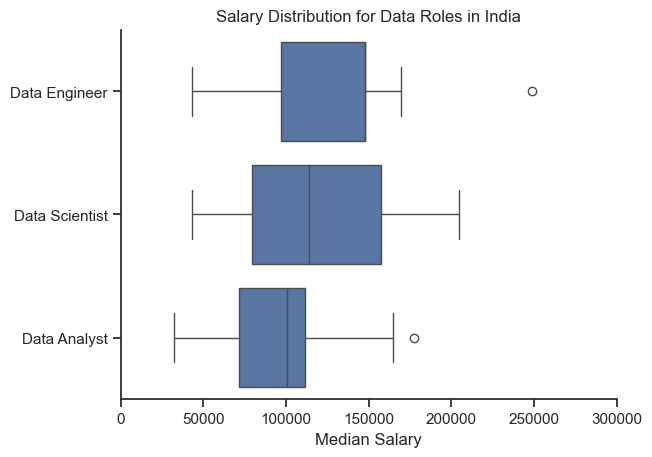

In [79]:
sns.boxplot(data=df_plot_top,x='salary_year_avg',y='job_title_short',order=order_list)
plt.xlim(0,300000)
sns.despine()
plt.ylabel('')
plt.xlabel('Median Salary')
plt.title(f'Salary Distribution for Data Roles in {selected_country}')

### Top Skills for Data Analyst and How they are paid?


In [80]:
df_da=df_sel[df_sel['job_title_short']== selected_title].explode('job_skills')
df_skill_pay=df_da.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)
df_skill_pay

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [81]:
df_skills_top=df_da.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False).head(10)
df_skills_top=df_skills_top.sort_values(by='median', ascending=False)
df_skills_top

,count,median
job_skills,,
power bi,17,111175.0
spark,11,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


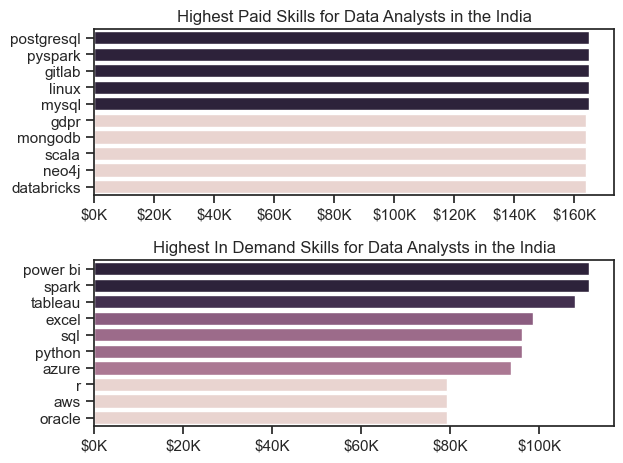

In [82]:
fig , ax = plt.subplots(2,1)

sns.set_theme(style='ticks')
sns.barplot(data=df_skill_pay,x='median',y=df_skill_pay.index,hue='median',ax=ax[0],legend=False)
ax[0].set_title(f'Highest Paid Skills for Data Analysts in the {selected_country}')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_skills_top,x='median',y=df_skills_top.index,hue='median',ax=ax[1],legend=False)
ax[1].set_title(f'Highest In Demand Skills for Data Analysts in the {selected_country}')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()